In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load Data
raw_data = pd.read_csv('nba2k20-full.csv')
raw_data.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [3]:
#Make a copy of the raw data
data_unprocessed = raw_data.copy()

In [4]:
data_unprocessed.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
full_name,429,429,LeBron James,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,429.0,NaN,NaN,NaN,76.37296,5.657748,67.0,72.0,75.0,79.0,97.0
jersey,429,52,#0,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team,406,30,Milwaukee Bucks,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
position,429,7,G,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b_day,429,415,09/19/96,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,429,20,6-6 / 1.98,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,429,84,215 lbs. / 97.5 kg.,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,429,308,$1416852,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,429,39,USA,323,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ***DATA CLEANING***

In [5]:
# Calculate the missing values for each feature
data_unprocessed.isnull().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
dtype: int64

In [6]:
#Drop jersey,team,college,full_name,and draft_year from dataset
data_unprocessed.drop(['jersey', 'team', 'college', 'full_name', 'draft_year'], inplace = True, axis = 1)

In [7]:
# Re-named draft-peak column to draft pick
data_unprocessed.rename(columns = {'draft_peak':'draft_pick'}, inplace = True)

In [8]:
# We can classify which position values we need and combine positions that are duplicates
data_unprocessed['position'].value_counts()

G      169
F      138
C       48
F-C     36
G-F     19
F-G     13
C-F      6
Name: position, dtype: int64

In [9]:
data_unprocessed['position'].replace('F-G', 'G-F', inplace = True)
data_unprocessed['position'].replace('C-F', 'F-C', inplace = True)

data_unprocessed['position'].value_counts()

G      169
F      138
C       48
F-C     42
G-F     32
Name: position, dtype: int64

In [10]:
data_unprocessed.isnull().sum()

rating         0
position       0
b_day          0
height         0
weight         0
salary         0
country        0
draft_round    0
draft_pick     0
dtype: int64

In [11]:
# Only save year of b-day to variable year
data_unprocessed[['month', 'date','year']] = data_unprocessed['b_day'].str.split('/', expand = True)

#Change data type of year and add 1900 so we can calculate the exact age
data_unprocessed['year'] = data_unprocessed['year'].astype('int64')
data_unprocessed.loc[data_unprocessed['year'] != 0, 'year'] = 2020 - data_unprocessed['year'] - 1900
data_unprocessed.loc[data_unprocessed['year'] == 0, 'year'] = 2020 - data_unprocessed['year'] - 2000

#Create age variable
data_unprocessed['age'] = data_unprocessed['year']

# Drop b_day column
data_unprocessed.drop(['b_day', 'month', 'date', 'year'], inplace = True, axis = 1)

In [12]:
# Only save pounds value under weight
data_unprocessed['weight'] = data_unprocessed['weight'].str.slice(start = 0, stop = 3)

# Change data type of weight
data_unprocessed['weight'] = data_unprocessed['weight'].astype('int64')

In [13]:
# Remove $ so it can be converted to a float
data_unprocessed['salary'] = data_unprocessed['salary'].str.slice(start = 1)

#Change data type of Salary to float
data_unprocessed['salary'] = data_unprocessed['salary'].astype('float')

In [14]:
# We have a lot of data that shows players that were not drafted
# I will map those values to 0 
data_unprocessed.loc[data_unprocessed['draft_pick'] == 'Undrafted']

,rating,position,height,weight,salary,country,draft_round,draft_pick,age
81,80,F,6-7 / 2.01,209,11301219.0,USA,Undrafted,Undrafted,30
101,79,F,6-7 / 2.01,209,11454546.0,Australia,Undrafted,Undrafted,33
109,79,G,6-1 / 1.85,197,9346153.0,USA,Undrafted,Undrafted,26
121,78,F,6-8 / 2.03,220,4767000.0,USA,Undrafted,Undrafted,30
167,76,G,5-10 / 1.78,175,2564753.0,Puerto Rico,Undrafted,Undrafted,36
...,...,...,...,...,...,...,...,...,...
420,69,F,6-7 / 2.01,205,1588231.0,USA,Undrafted,Undrafted,27
424,68,G,6-0 / 1.83,180,522738.0,USA,Undrafted,Undrafted,25
426,68,F,6-10 / 2.08,200,79568.0,Greece,Undrafted,Undrafted,23
427,68,G,6-3 / 1.91,190,898310.0,USA,Undrafted,Undrafted,20


In [15]:
# Draft_round only has these unique values
data_unprocessed['draft_round'].unique()

array(['1', '2', 'Undrafted'], dtype=object)

In [16]:
# Draft_pick only has these unique values
data_unprocessed['draft_pick'].unique()

array(['1', '15', '2', '3', '7', '10', '6', '41', '4', '11', '30', '27',
       '13', '9', '5', '35', '17', '16', '18', '25', '19', '24', '39',
       '45', '31', '36', '32', '48', '12', '38', '47', '8', '33',
       'Undrafted', '40', '14', '22', '42', '46', '20', '29', '26', '51',
       '43', '34', '21', '23', '60', '44', '28', '37', '55', '49', '50',
       '52', '54', '58'], dtype=object)

In [17]:
# Changed Undrafted to 0 meaning not drafted at all
data_unprocessed['draft_round'].replace('Undrafted', '0', inplace = True)
data_unprocessed['draft_pick'].replace('Undrafted', '0', inplace = True)

In [18]:
#Change data type of draft_round and draft_pick to int32
data_unprocessed['draft_round'] = data_unprocessed['draft_round'].astype('int32')
data_unprocessed['draft_pick'] = data_unprocessed['draft_pick'].astype('int32')


data_unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       429 non-null    int64  
 1   position     429 non-null    object 
 2   height       429 non-null    object 
 3   weight       429 non-null    int64  
 4   salary       429 non-null    float64
 5   country      429 non-null    object 
 6   draft_round  429 non-null    int32  
 7   draft_pick   429 non-null    int32  
 8   age          429 non-null    int64  
dtypes: float64(1), int32(2), int64(3), object(3)
memory usage: 26.9+ KB


In [19]:
# Changed height variable from string to float giving height in foot
data_unprocessed['height'] = data_unprocessed['height'].str.slice(start = 0, stop = 3)


data_unprocessed[['foot', 'inches']] = data_unprocessed.height.str.split('-', expand = True)
data_unprocessed['foot'] = data_unprocessed['foot'].astype('int64')
data_unprocessed['inches'] = data_unprocessed['inches'].astype('int64')
data_unprocessed['inches'] = data_unprocessed['inches']/12
data_unprocessed['height'] = data_unprocessed['inches'] + data_unprocessed['foot']

In [20]:
data_unprocessed.head()

,rating,position,height,weight,salary,country,draft_round,draft_pick,age,foot,inches
0,97,F,6.750000,250,37436858.0,USA,1,1,36,6,0.750000
1,97,F,6.583333,225,32742000.0,USA,1,15,29,6,0.583333
2,96,G-F,6.083333,242,25842697.0,Greece,1,15,26,6,0.083333
3,96,F,6.083333,230,37199000.0,USA,1,2,32,6,0.083333
4,96,G,6.416667,220,38199000.0,USA,1,3,31,6,0.416667


In [21]:
# Now we can drop the foot and inches columns
data_unprocessed.drop(['foot', 'inches'], axis = 1, inplace = True)

In [22]:
#Making sure the calculuation is correct and it dropped the correct columns
data_unprocessed.head()

,rating,position,height,weight,salary,country,draft_round,draft_pick,age
0,97,F,6.750000,250,37436858.0,USA,1,1,36
1,97,F,6.583333,225,32742000.0,USA,1,15,29
2,96,G-F,6.083333,242,25842697.0,Greece,1,15,26
3,96,F,6.083333,230,37199000.0,USA,1,2,32
4,96,G,6.416667,220,38199000.0,USA,1,3,31


In [23]:
data_cleaned = data_unprocessed.copy()

# ***EDA***

In [24]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       429 non-null    int64  
 1   position     429 non-null    object 
 2   height       429 non-null    float64
 3   weight       429 non-null    int64  
 4   salary       429 non-null    float64
 5   country      429 non-null    object 
 6   draft_round  429 non-null    int32  
 7   draft_pick   429 non-null    int32  
 8   age          429 non-null    int64  
dtypes: float64(2), int32(2), int64(3), object(2)
memory usage: 26.9+ KB


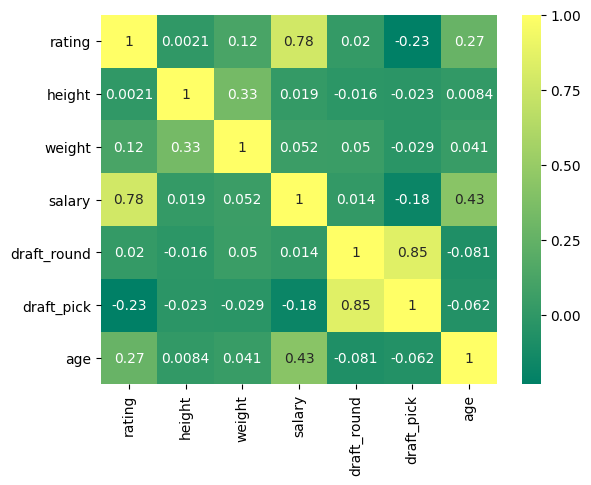

In [25]:
# Create a DataFrame of Numerical Variables to use for heatmap
nv = data_cleaned.filter(['rating', 'height', 'weight', 'salary','draft_round', 'draft_pick', 'age'], axis = 1)
sns.heatmap(nv.corr(), cmap = 'summer', annot = True)
plt.show()

***We see that by looking at the heatmap that we are using this data to predict the salary of players that the top features that has a strong relationship with salary is rating and age. This should not be a surprise because a player's salary is based on his performance on the court.***

***We also see from the data that draft round and draft pick is not a good predictor of player performance. Usually a team believe they are getting the best player for their team or a player that is seen as a good investment for their franchise. Not many players perform at their utmost potential in their first couple of years in the league.***

***Seeing such poor correlation between draft round and draft pick tells me that a lot of the players in our dataset are not players that was recently drafted in the league.***

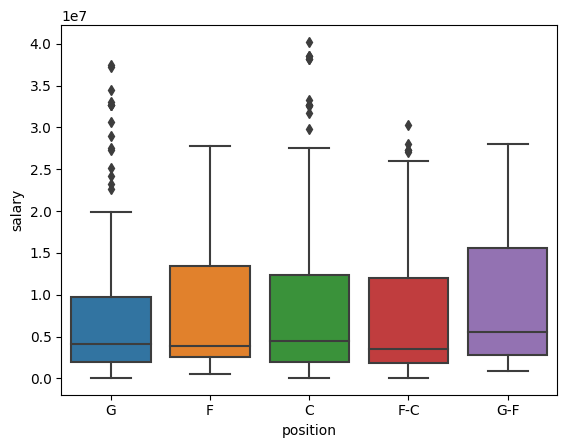

In [26]:
sns.boxplot(x='position', y='salary', data = data_cleaned)
plt.xticks([0, 1, 2, 3, 4], ['G','F','C','F-C','G-F'])
plt.show()

***It seems if you are able to play as a Guard/Forward you are paid more than a player who can play as a Forward/Center and other positions.***

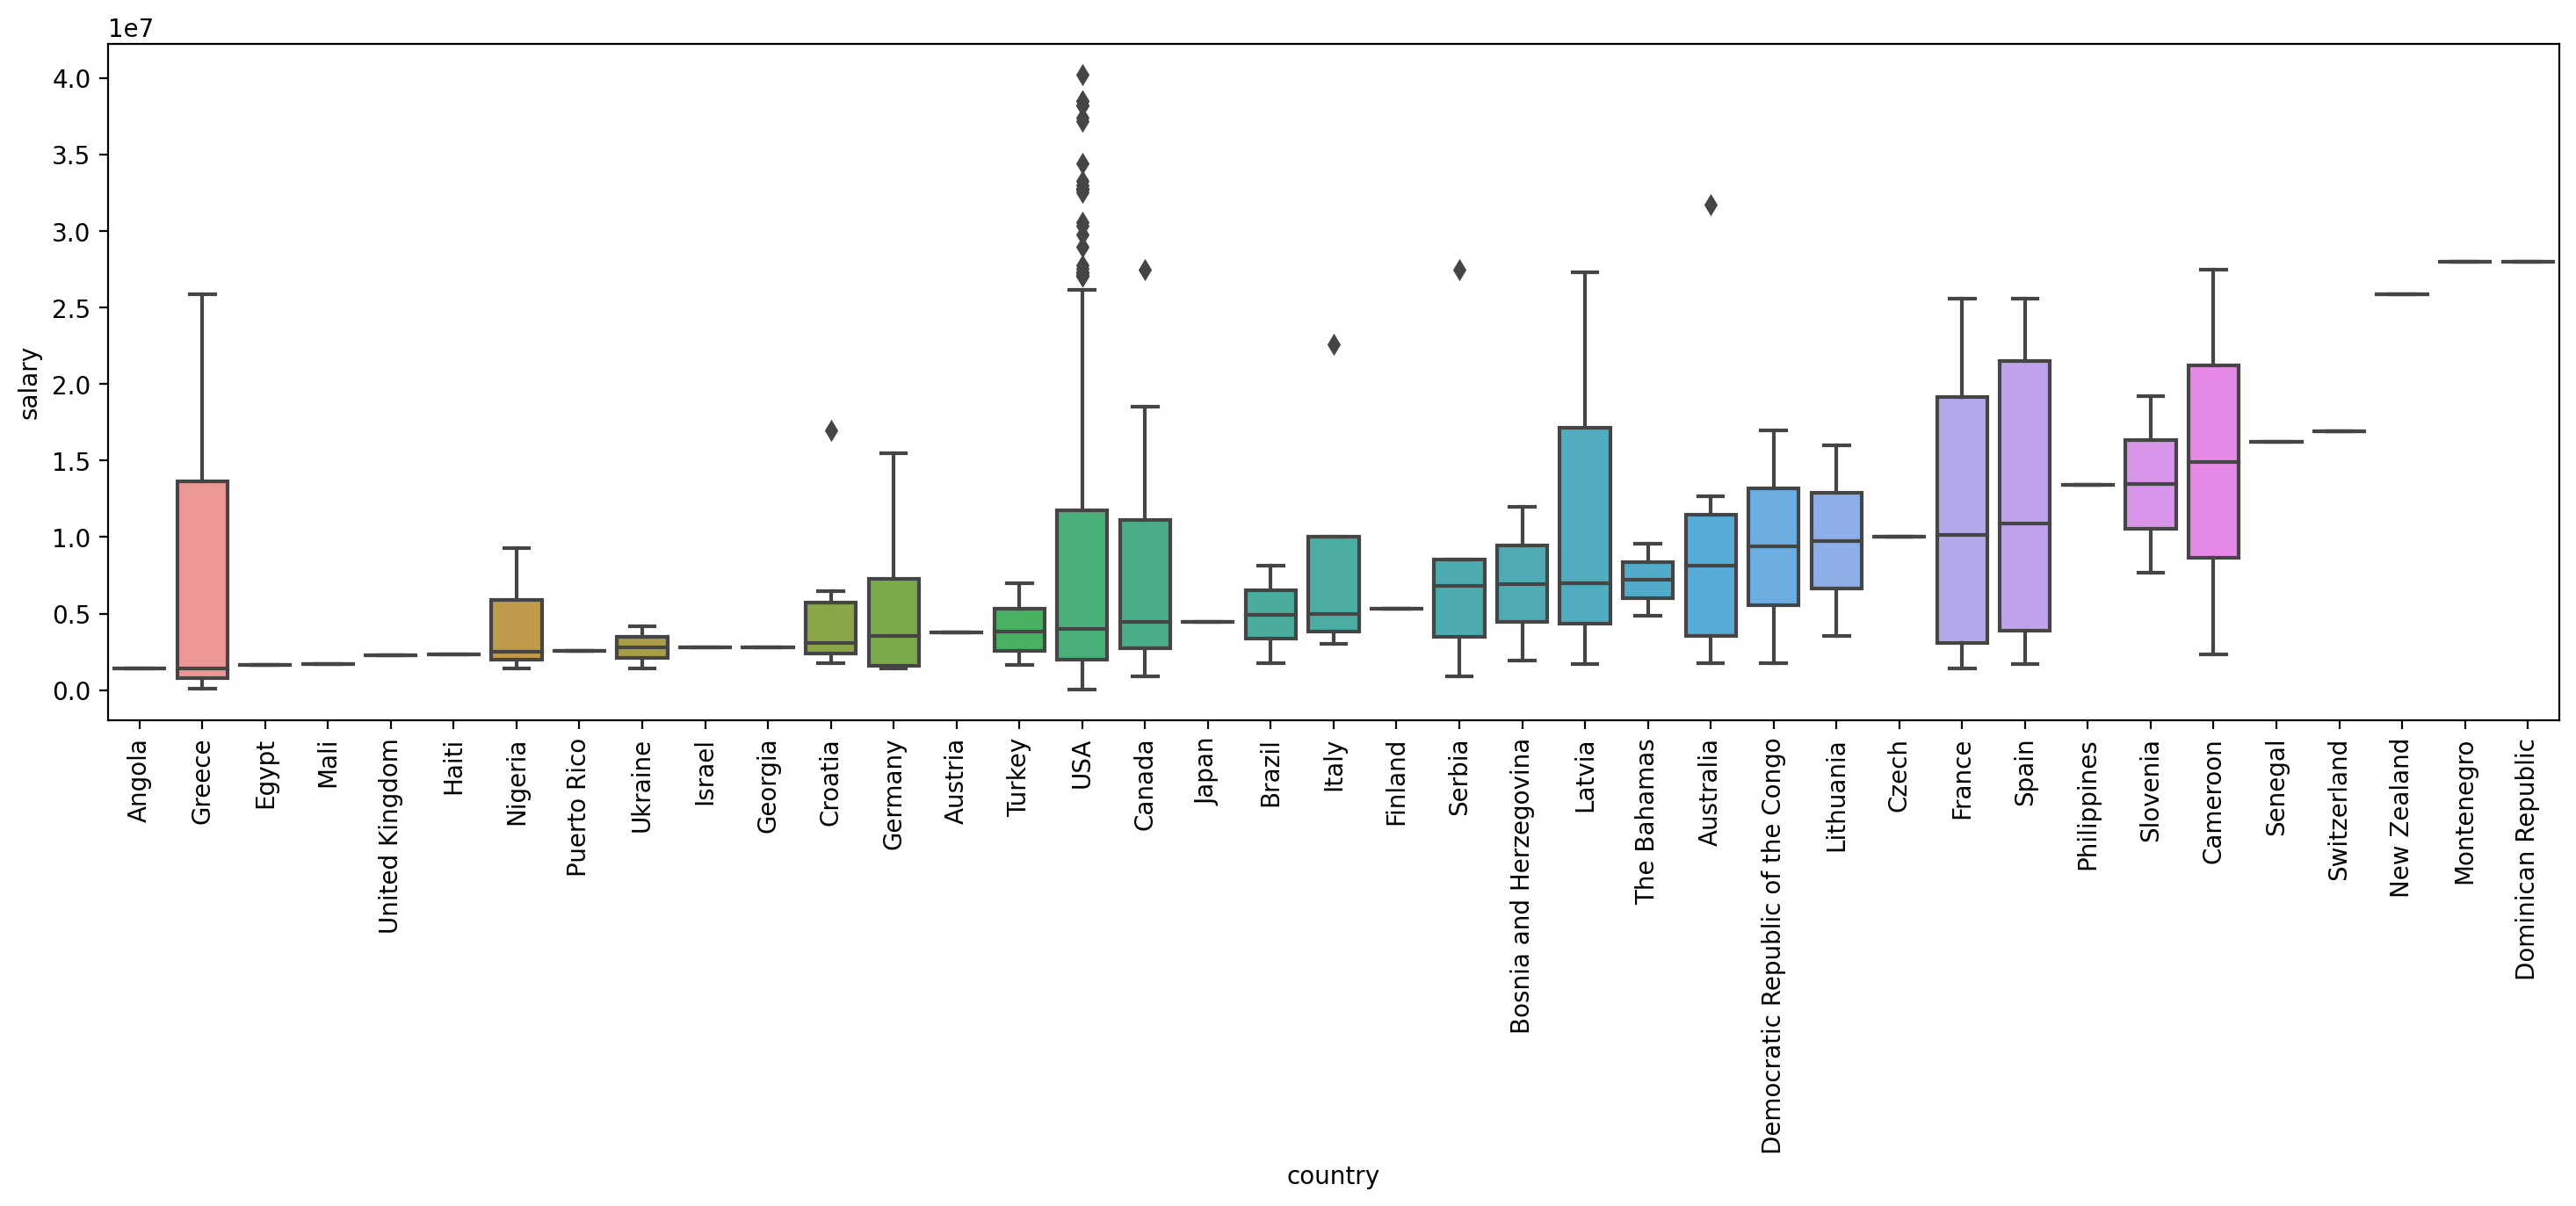

In [27]:
#Re-order the countries by median salary to graph as boxplot
country_salary = data_cleaned.groupby('country')['salary'].median().sort_values()

plt.figure(figsize = (18,5),dpi=200)
sns.boxplot(x ='country', y='salary', data = data_cleaned,order=country_salary.index)
plt.xticks(rotation = 'vertical')
plt.show()

***The median for the USA is lower than other countries because the amount of players from other countries because the NBA mainly draft players from the USA. Some countries only have lines meaning it was only 1 salary recorded for that
specific country***
***We have more outliers shown in the dataset for USA compared to other countries, which is expected as well.***

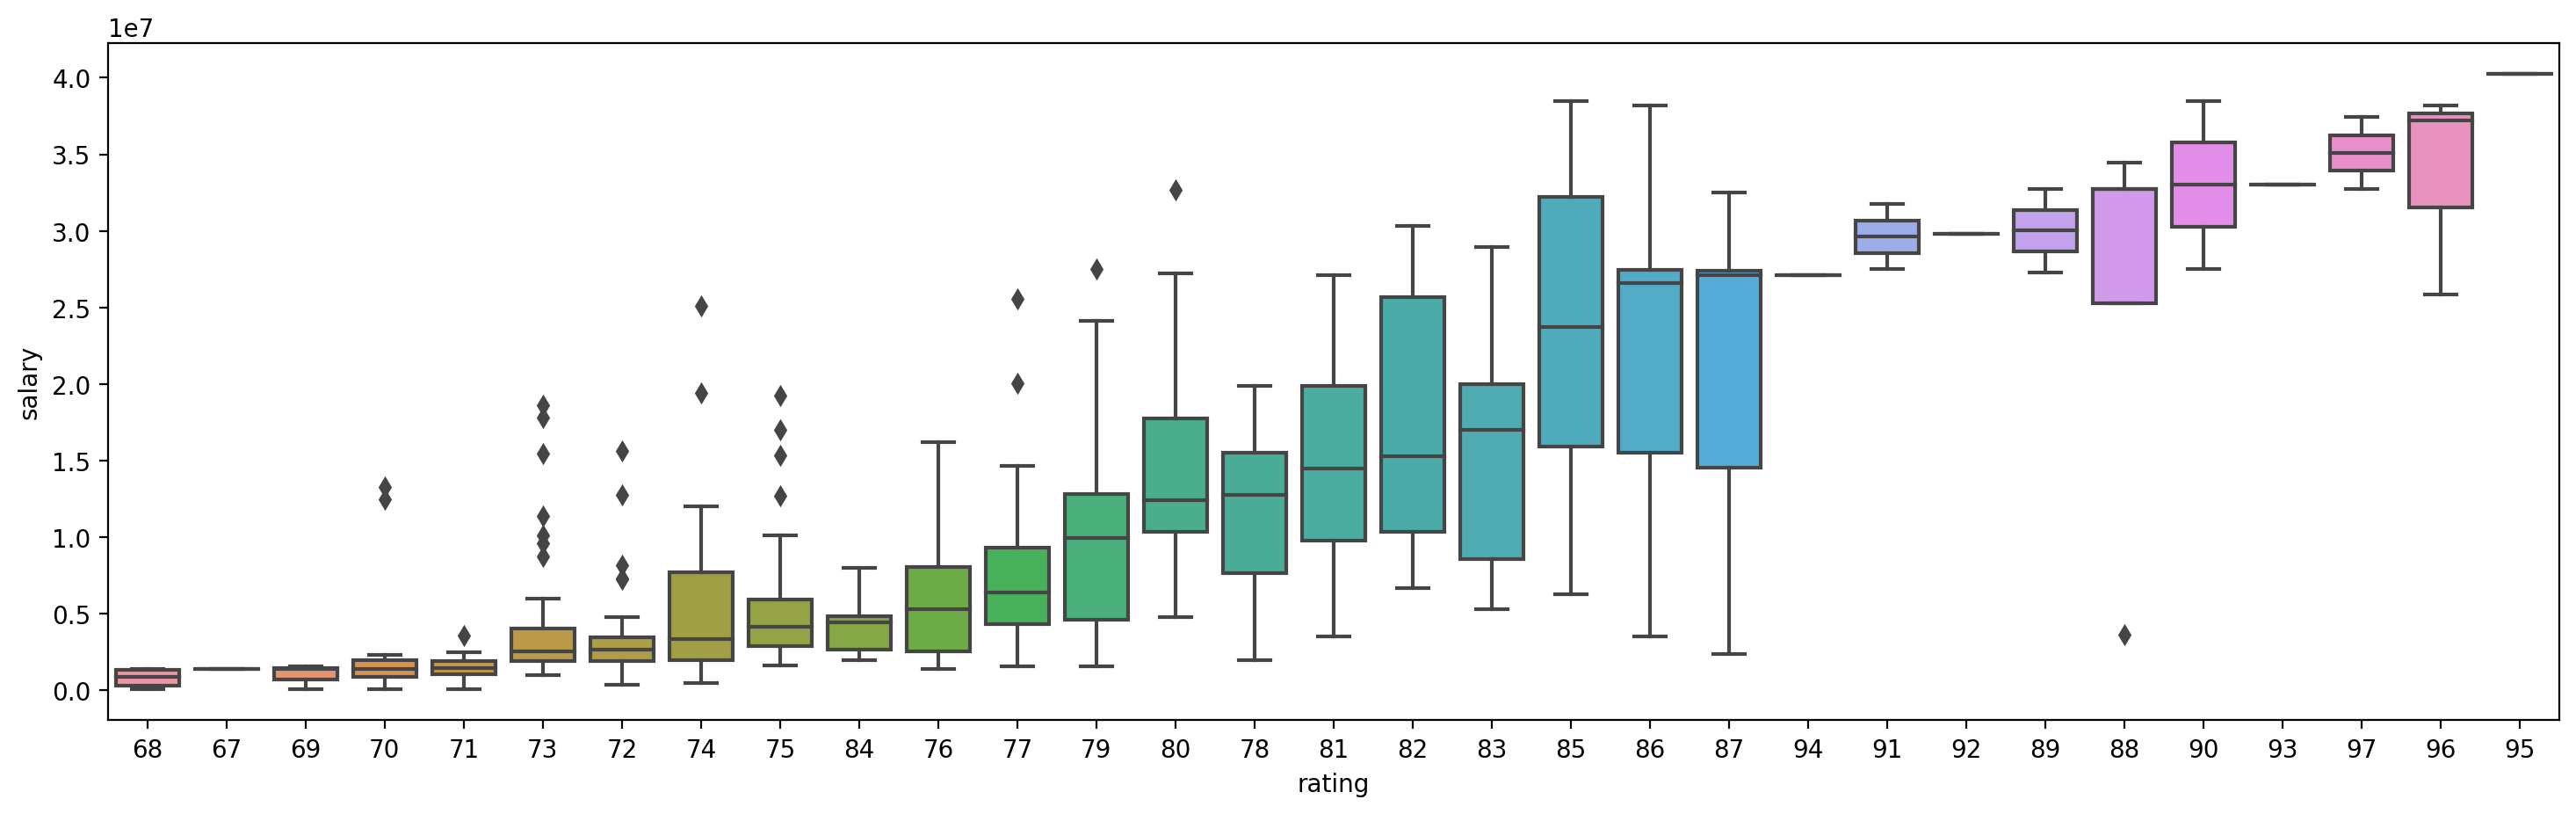

In [28]:
#Re-order ratings by median salary to graph as boxplot
salary_rating = data_cleaned.groupby('rating')['salary'].median().sort_values()

plt.figure(figsize = (18,5),dpi=200)
sns.boxplot(x ='rating', y='salary', data = data_cleaned,order=salary_rating.index)
plt.show()

***From looking at the rating vs salary boxplot and the bulk of the outliers came from players who were in the 70's rating pool.***
***.Will analyze the countries and positions by creating dummy variables will then obtain the heatmap to determine whether they influence player salary.Will analyze how much data to remove due to the amount of outliers shown for players with ratings in the 70's.***

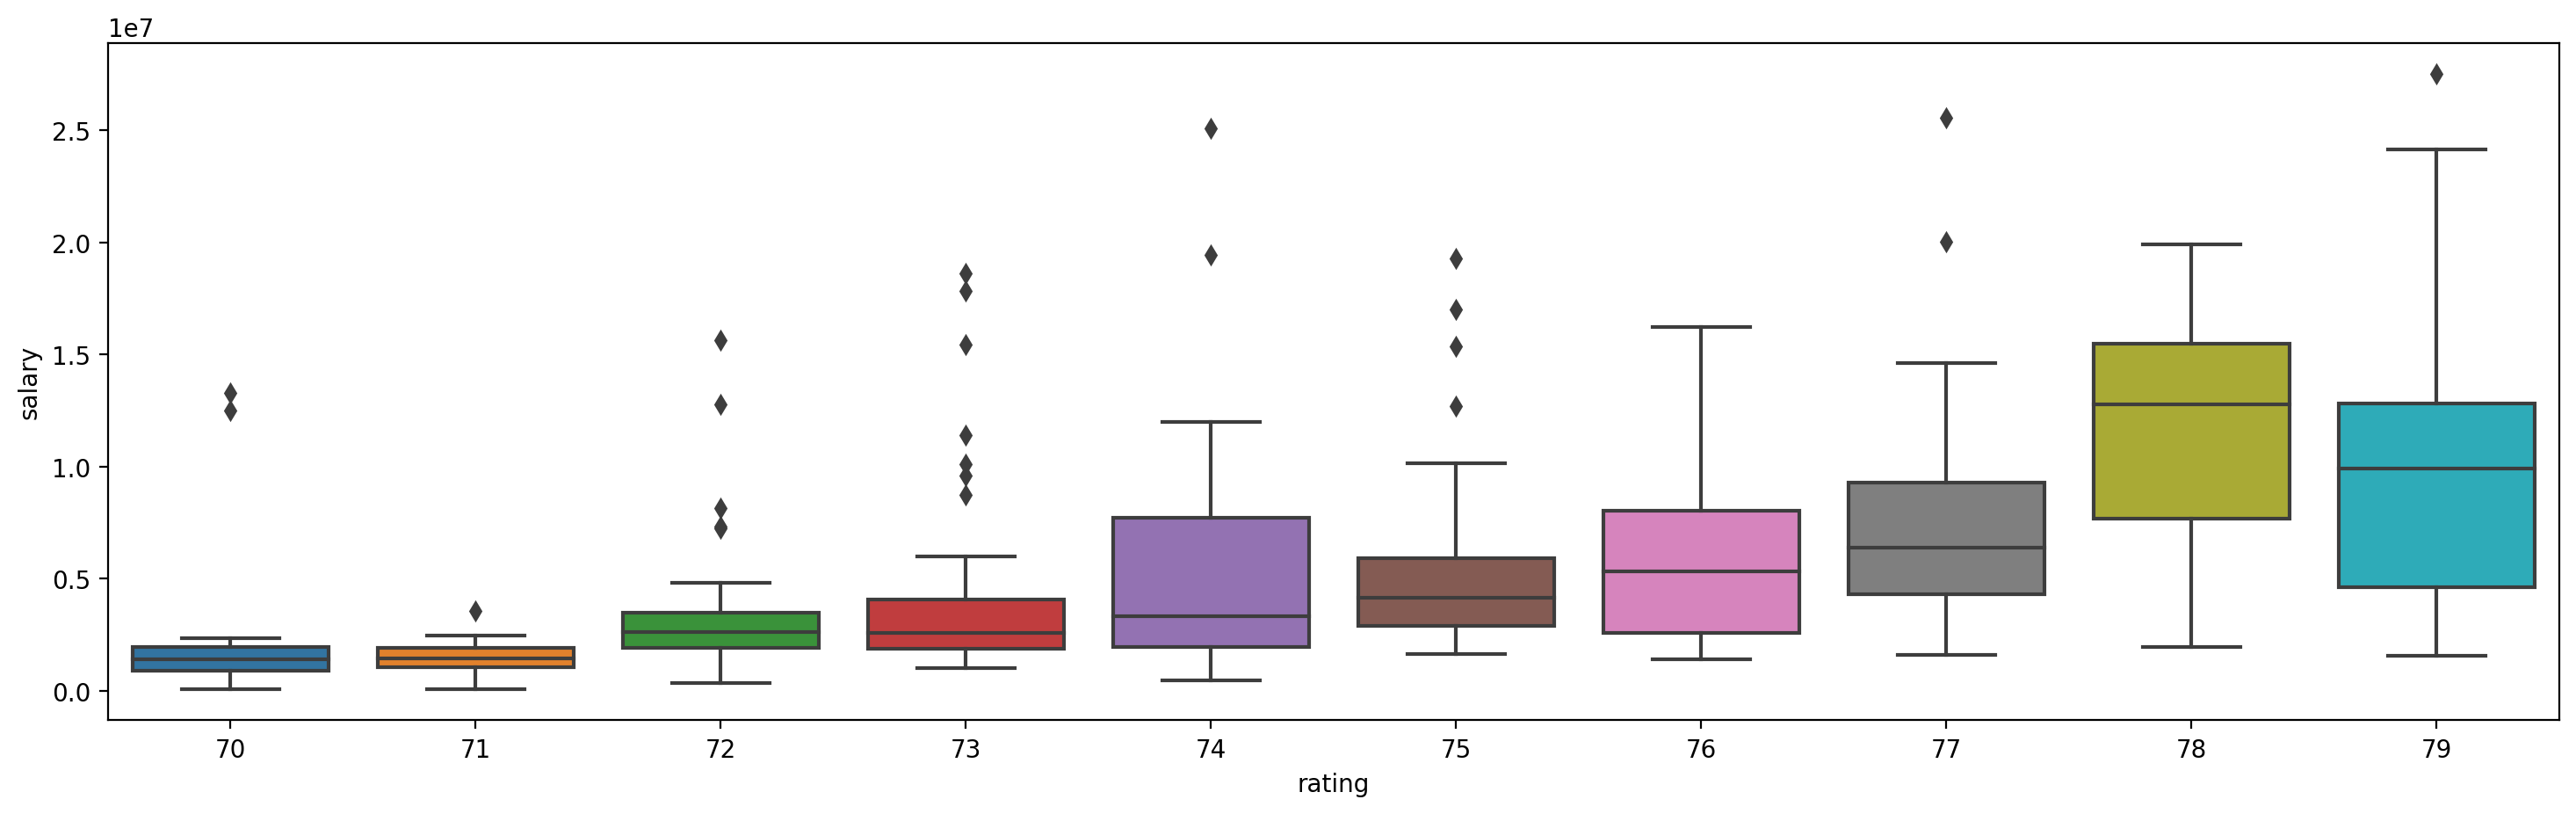

In [29]:
#Only grouping players with a rating in the 70's
rating_70 = data_cleaned[(data_cleaned['rating'] > 69) & (data_cleaned['rating'] < 80)]

#Showing a graph between age vs salary
plt.figure(figsize = (18,5),dpi=200)
sns.boxplot(data=rating_70,x='rating',y='salary')
plt.show()

***It seems a lot of the outliers were in the age range between 23-27.The median for this age group is much 
lower than the older ages which is expected but they could've overpaid those specific players.***

In [30]:
# Will use z-score to remove outliers that is greater and less than 3 std away from the mean

data_cleaned['z_score']=stats.zscore(data_cleaned['salary'])
data_cleaned = data_cleaned.loc[data_cleaned['z_score'].abs()<=3]

In [31]:
#Drop the z_score column and country column

data_cleaned.drop(['z_score','country'],inplace=True,axis=1)

In [32]:
data_cleaned = pd.get_dummies(data_cleaned,drop_first=True)

In [33]:
#Separate the features and labels
X = data_cleaned.drop('salary',axis=1)
y = data_cleaned['salary']

In [34]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
#Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [36]:
# Scale the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Import Pipeline and Gridsearch to run models 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

#Import models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
#Create an instance of each model

knn = KNeighborsRegressor()
svr = SVR()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

In [39]:
# Create steps for parameters and steps for the Pipeline and GridSearch

operations = [('knn',knn), 
              ('svr',svr),
              ('rf',rf), 
              ('gb',gb)]

knn_grid = {'knn__n_neighbors':list(range(1,10))}

svr_grid = {'svr__degree':list(range(2,10)),
             'svr__C': [0.001,0.01,0.1,0.5,1],
             'svr__epsilon': [0.001,0.01,0.1,0.5,1],
             'svr__gamma': ['scale', 'auto'],
            }

rf_grid = {'rf__n_estimators': [1,5,10,20,40,100]}


gb_grid = {'gb__n_estimators': [1,5,10,20,40,100]}

param_grid = [knn_grid, svr_grid, rf_grid, gb_grid]
models = ['KNN', 'SVR', 'RF', 'GB']

In [40]:
def compute(oper,param,model):
    pipe = Pipeline(steps = [oper])
    grid = GridSearchCV(pipe,param_grid=param)
    grid.fit(X_train,y_train)
    pred = grid.predict(X_test)
    print(f"{model} R2 score: {r2_score(y_test,pred)}")    

In [41]:
for i in range(len(operations)):
    compute(operations[i],param_grid[i],models[i])

KNN R2 score: 0.4787712920477075
SVR R2 score: -0.28471431210943376
RF R2 score: 0.6126632187972039
GB R2 score: 0.5995798613104767
